Descrição Inicial do Conjunto de Dados

O conjunto de dados contém informações sobre hábitos de vida, histórico familiar, consumo alimentar, atividades físicas e meios de transporte, com o objetivo de prever o nível de obesidade de um indivíduo.

    Número de observações (linhas): 2.111

    Número de variáveis (colunas): 17

    Tipos de variáveis:

    Numéricas (float64): 8 colunas (ex: Age, Height, Weight, FAF)

    Categóricas (object): 9 colunas (ex: Gender, FAVC, Obesity)

In [3]:
pip install gspread

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skl
import numpy as np
from scipy import stats
import pickle
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

In [9]:
df = pd.read_csv("../dados/Obesity-prediction.csv")

In [10]:
print("\n Dados do dataframe: \n")
df.info()
print ("\nNumero de colunas e linhas: \n")
df.shape
print("\nAmostra das primeiras linhas: \n")
df.head()


 Dados do dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float6

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


🔍 Amostra das primeiras linhas:

Tratamento de Dados Ausentes ou Ruidosos




In [11]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

#Tratamento de Dados Ausentes/Ruidosos

In [12]:
# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Verificando dados duplicados
print(f"\nNúmero de linhas duplicadas: {df.duplicated().sum()}")

# Verificando valores inconsistentes/ruidosos nas colunas numéricas
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Convertendo colunas numéricas para tipo numérico, tratando erros (coerce)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificando novamente se há valores ausentes após a coerção
print("\nValores ausentes após coerção para numérico:")
print(df[numeric_cols].isnull().sum())

# Opcional: Lidar com os valores ausentes criados pela coerção (por exemplo, preencher com a média ou mediana)
# Exemplo: preencher com a mediana
for col in numeric_cols:
     df[col] = df[col].fillna(df[col].median())


print("\nVerificação de outliers (valores fora de 3 desvios padrão):")
for col in numeric_cols:
    # Garantir que a coluna seja numérica antes de calcular os z-scores
    if pd.api.types.is_numeric_dtype(df[col]):
        z_scores = stats.zscore(df[col])
        outliers = np.abs(z_scores) > 3
        print(f"{col}: {outliers.sum()} outliers")
    else:
        print(f"A coluna {col} não é totalmente numérica após a limpeza.")

Valores ausentes por coluna:
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

Número de linhas duplicadas: 24

Valores ausentes após coerção para numérico:
Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: int64

Verificação de outliers (valores fora de 3 desvios padrão):
Age: 24 outliers
Height: 0 outliers
Weight: 1 outliers
FCVC: 0 outliers
NCP: 0 outliers
CH2O: 0 outliers
FAF: 0 outliers
TUE: 0 outliers


#Variáveis Categóricas e Variáveis Numéricas

In [13]:
print("\nEstatísticas descritivas para variáveis numéricas:")
print(df[numeric_cols].describe().round(2))

categorical_cols = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity']

print("\nFrequência de variáveis categóricas:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True).round(4)*100)


Estatísticas descritivas para variáveis numéricas:
           Age   Height   Weight     FCVC      NCP     CH2O      FAF      TUE
count  2111.00  2111.00  2111.00  2111.00  2111.00  2111.00  2111.00  2111.00
mean     24.31     1.70    86.59     2.42     2.69     2.01     1.01     0.66
std       6.35     0.09    26.19     0.53     0.78     0.61     0.85     0.61
min      14.00     1.45    39.00     1.00     1.00     1.00     0.00     0.00
25%      19.95     1.63    65.47     2.00     2.66     1.58     0.12     0.00
50%      22.78     1.70    83.00     2.39     3.00     2.00     1.00     0.63
75%      26.00     1.77   107.43     3.00     3.00     2.48     1.67     1.00
max      61.00     1.98   173.00     3.00     4.00     3.00     3.00     2.00

Frequência de variáveis categóricas:

Gender:
Gender
Male      50.59
Female    49.41
Name: proportion, dtype: float64

family_history:
family_history
yes    81.76
no     18.24
Name: proportion, dtype: float64

FAVC:
FAVC
yes    88.39
no     11.6

#Histogramas para variáveis numéricas

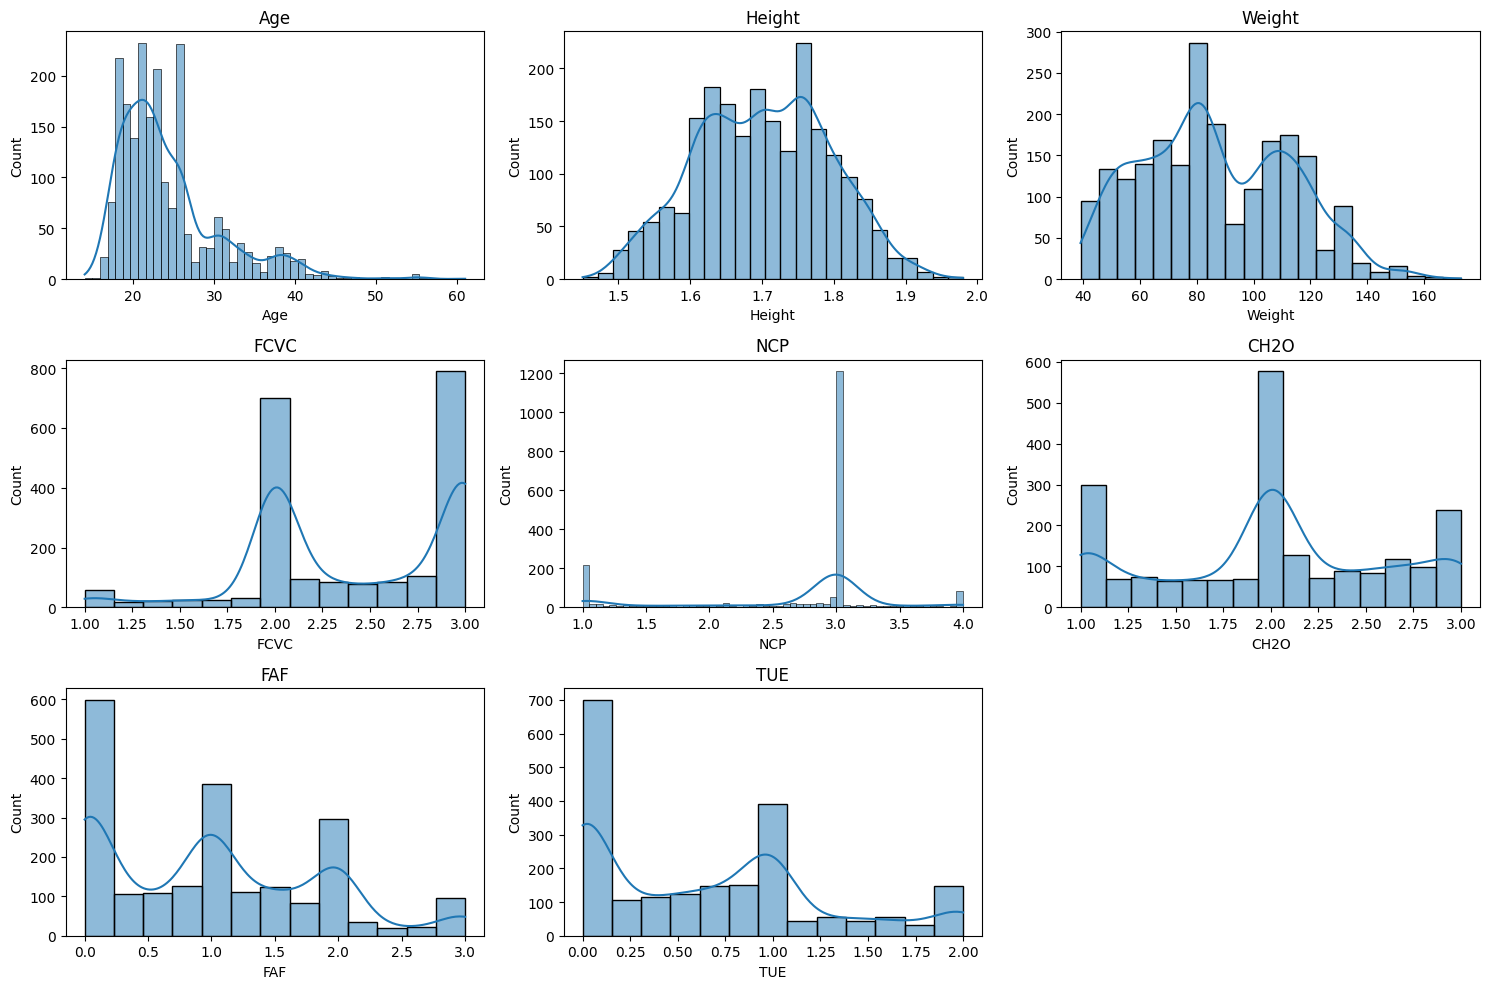

In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


#Boxplots para variáveis numéricas

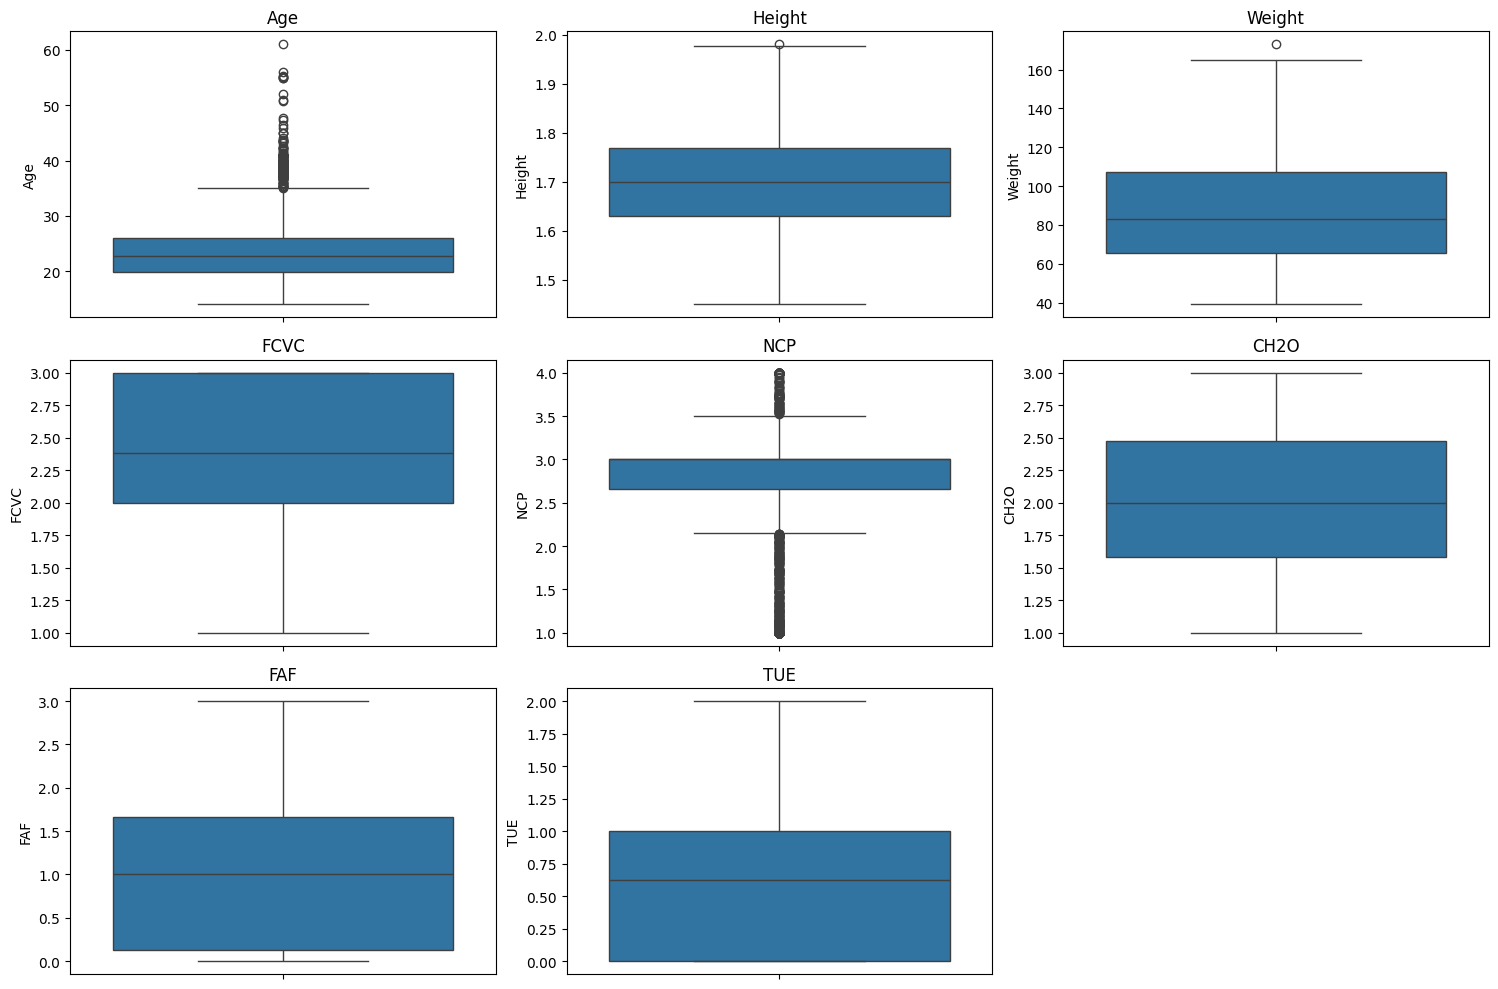

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


#Gráficos de barras para variáveis categóricas

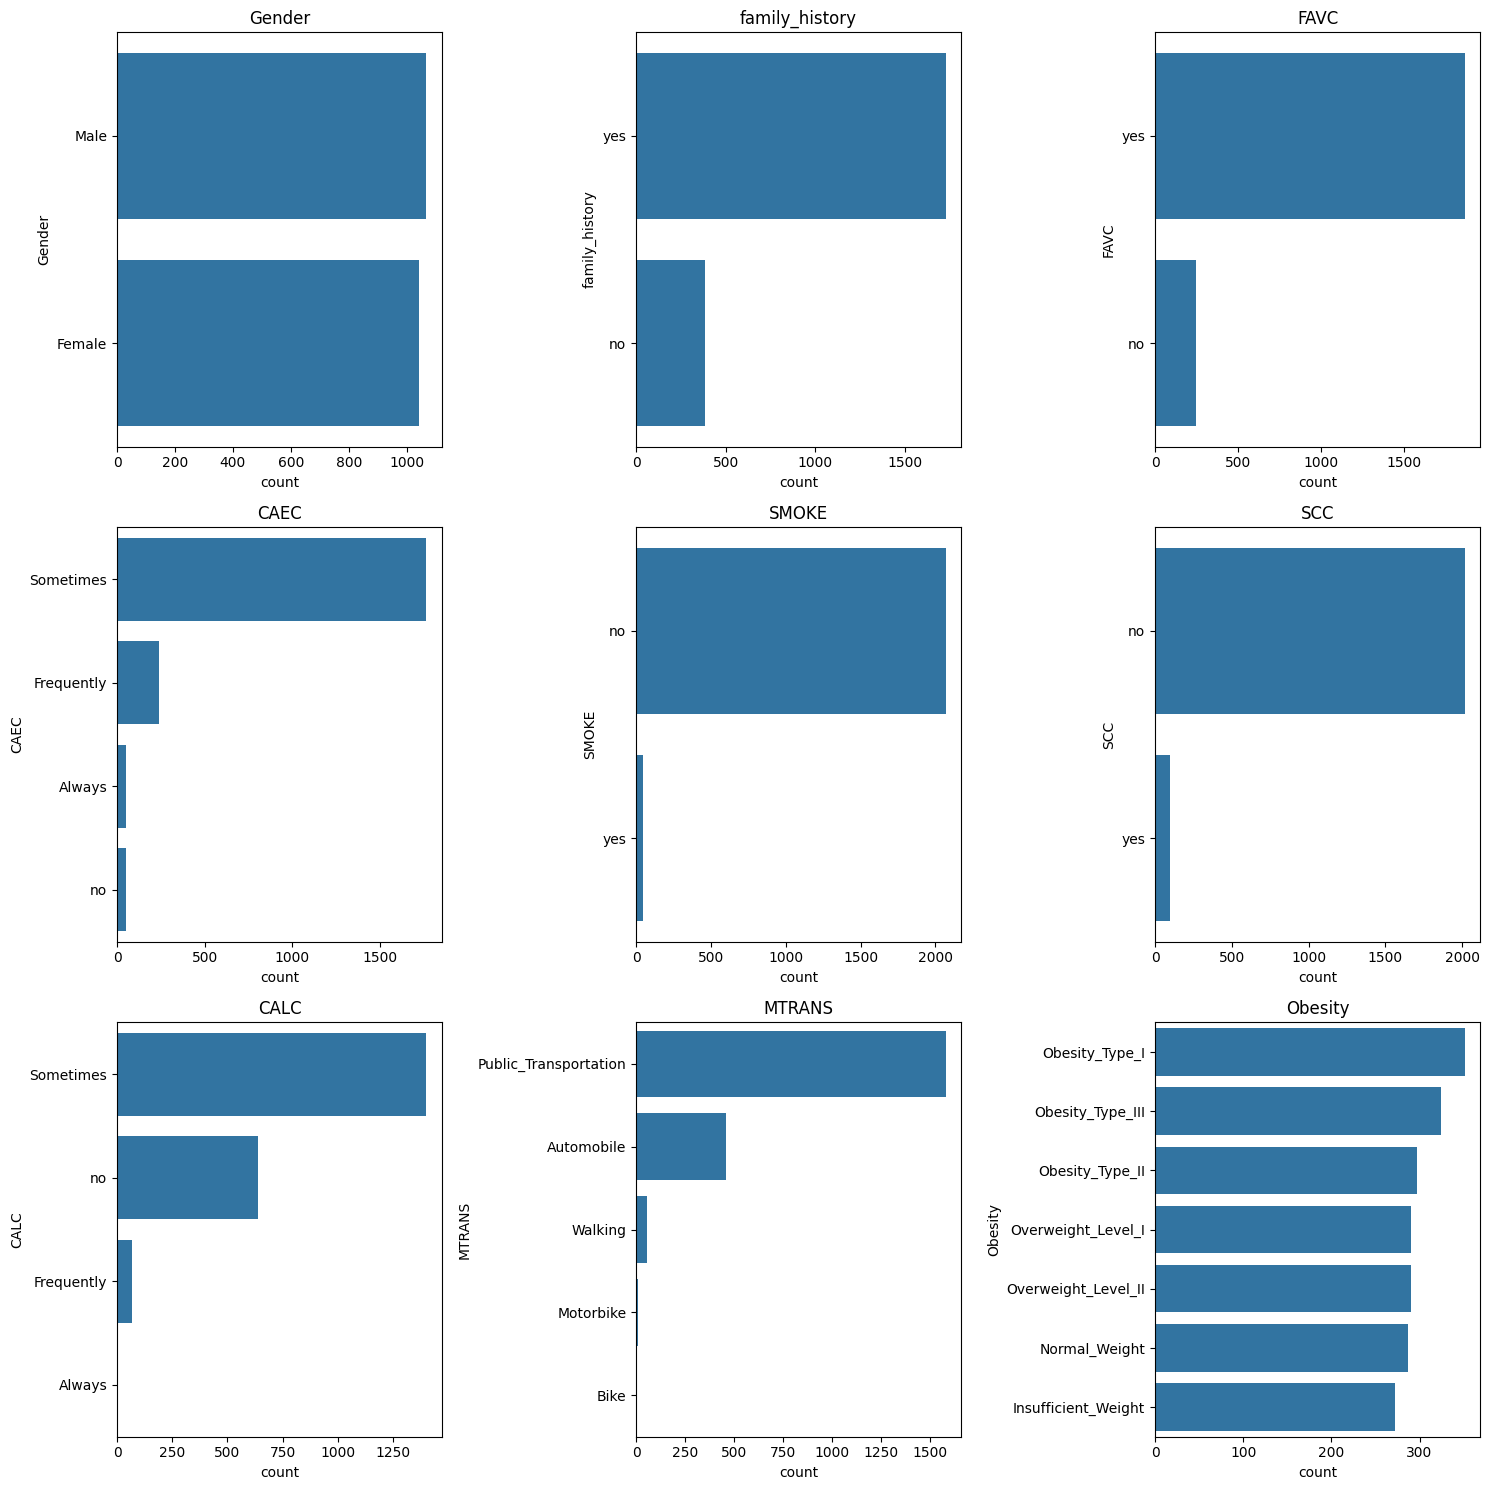

In [16]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(col)
plt.tight_layout()
plt.show()


#Teste de normalidade para variáveis numéricas

In [17]:
print("\nTeste de normalidade (Shapiro-Wilk):")
for col in numeric_cols:
    stat, p = stats.shapiro(df[col])
    print(f"{col}: p-value = {p:.4f} {'(Normal)' if p > 0.05 else '(Não normal)'}")



Teste de normalidade (Shapiro-Wilk):
Age: p-value = 0.0000 (Não normal)
Height: p-value = 0.0000 (Não normal)
Weight: p-value = 0.0000 (Não normal)
FCVC: p-value = 0.0000 (Não normal)
NCP: p-value = 0.0000 (Não normal)
CH2O: p-value = 0.0000 (Não normal)
FAF: p-value = 0.0000 (Não normal)
TUE: p-value = 0.0000 (Não normal)


# Assimetria e curtose

In [18]:
print("\nAssimetria e curtose:")
for col in numeric_cols:
    print(f"{col}:")
    print(f"  Assimetria: {df[col].skew():.4f}")
    print(f"  Curtose: {df[col].kurtosis():.4f}")



Assimetria e curtose:
Age:
  Assimetria: 1.5291
  Curtose: 2.8264
Height:
  Assimetria: -0.0129
  Curtose: -0.5629
Weight:
  Assimetria: 0.2554
  Curtose: -0.6999
FCVC:
  Assimetria: -0.4329
  Curtose: -0.6375
NCP:
  Assimetria: -1.1071
  Curtose: 0.3855
CH2O:
  Assimetria: -0.1049
  Curtose: -0.8794
FAF:
  Assimetria: 0.4985
  Curtose: -0.6206
TUE:
  Assimetria: 0.6185
  Curtose: -0.5487


#Matriz de correlação para variáveis numéricas

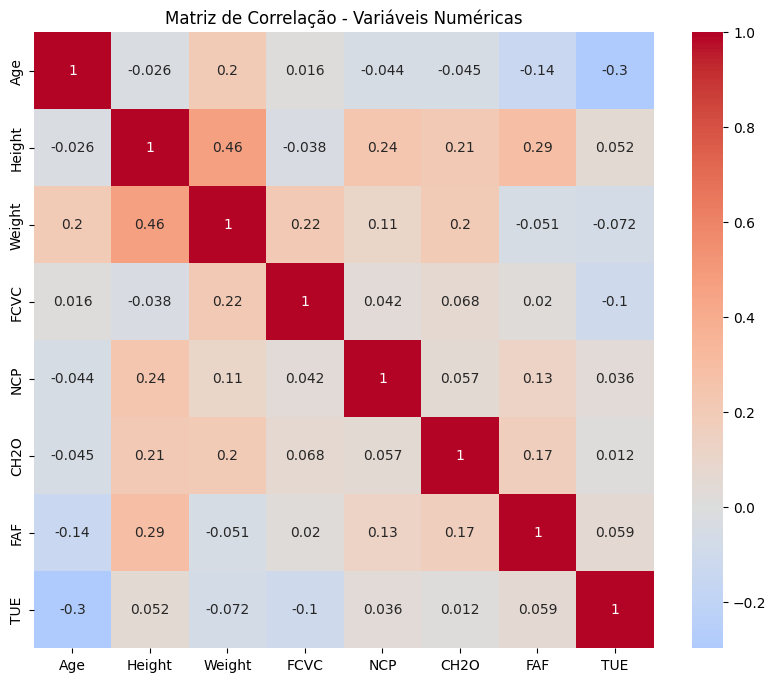

In [19]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()


#Tabelas de contingência para variáveis categóricas

In [20]:
print("\nTabelas de contingência importantes:")
print("\nObesidade por Gênero:")
print(pd.crosstab(df['Gender'], df['Obesity'], normalize='index').round(4)*100)

print("\nObesidade por Histórico Familiar:")
print(pd.crosstab(df['family_history'], df['Obesity'], normalize='index').round(4)*100)

print("\nObesidade por Consumo de Alimentos Calóricos:")
print(pd.crosstab(df['FAVC'], df['Obesity'], normalize='index').round(4)*100)



Tabelas de contingência importantes:

Obesidade por Gênero:
Obesity  Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  \
Gender                                                                         
Female                 16.59          13.52           14.96             0.19   
Male                    9.27          13.67           18.26            27.62   

Obesity  Obesity_Type_III  Overweight_Level_I  Overweight_Level_II  
Gender                                                              
Female              30.97               13.90                 9.88  
Male                 0.09               13.58                17.51  

Obesidade por Histórico Familiar:
Obesity         Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
family_history                                                       
no                            37.92          34.29            1.82   
yes                            7.30           8.98           19.93   

Obesity         Obesity_Ty

#Gráficos de dispersão para relações importantes

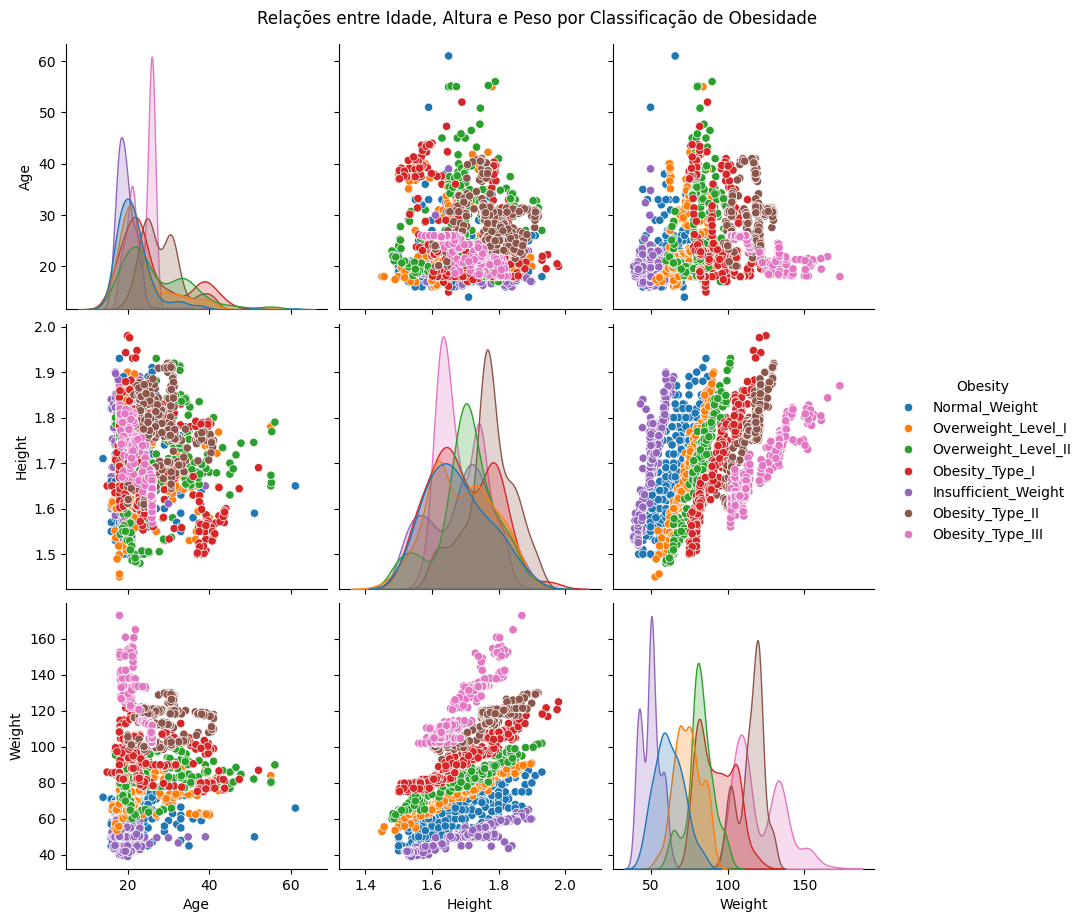

In [21]:
sns.pairplot(df[['Age', 'Height', 'Weight', 'Obesity']], hue='Obesity', height=3)
plt.suptitle('Relações entre Idade, Altura e Peso por Classificação de Obesidade', y=1.02)
plt.show()


#Mapa de calor de correlação com mais variáveis

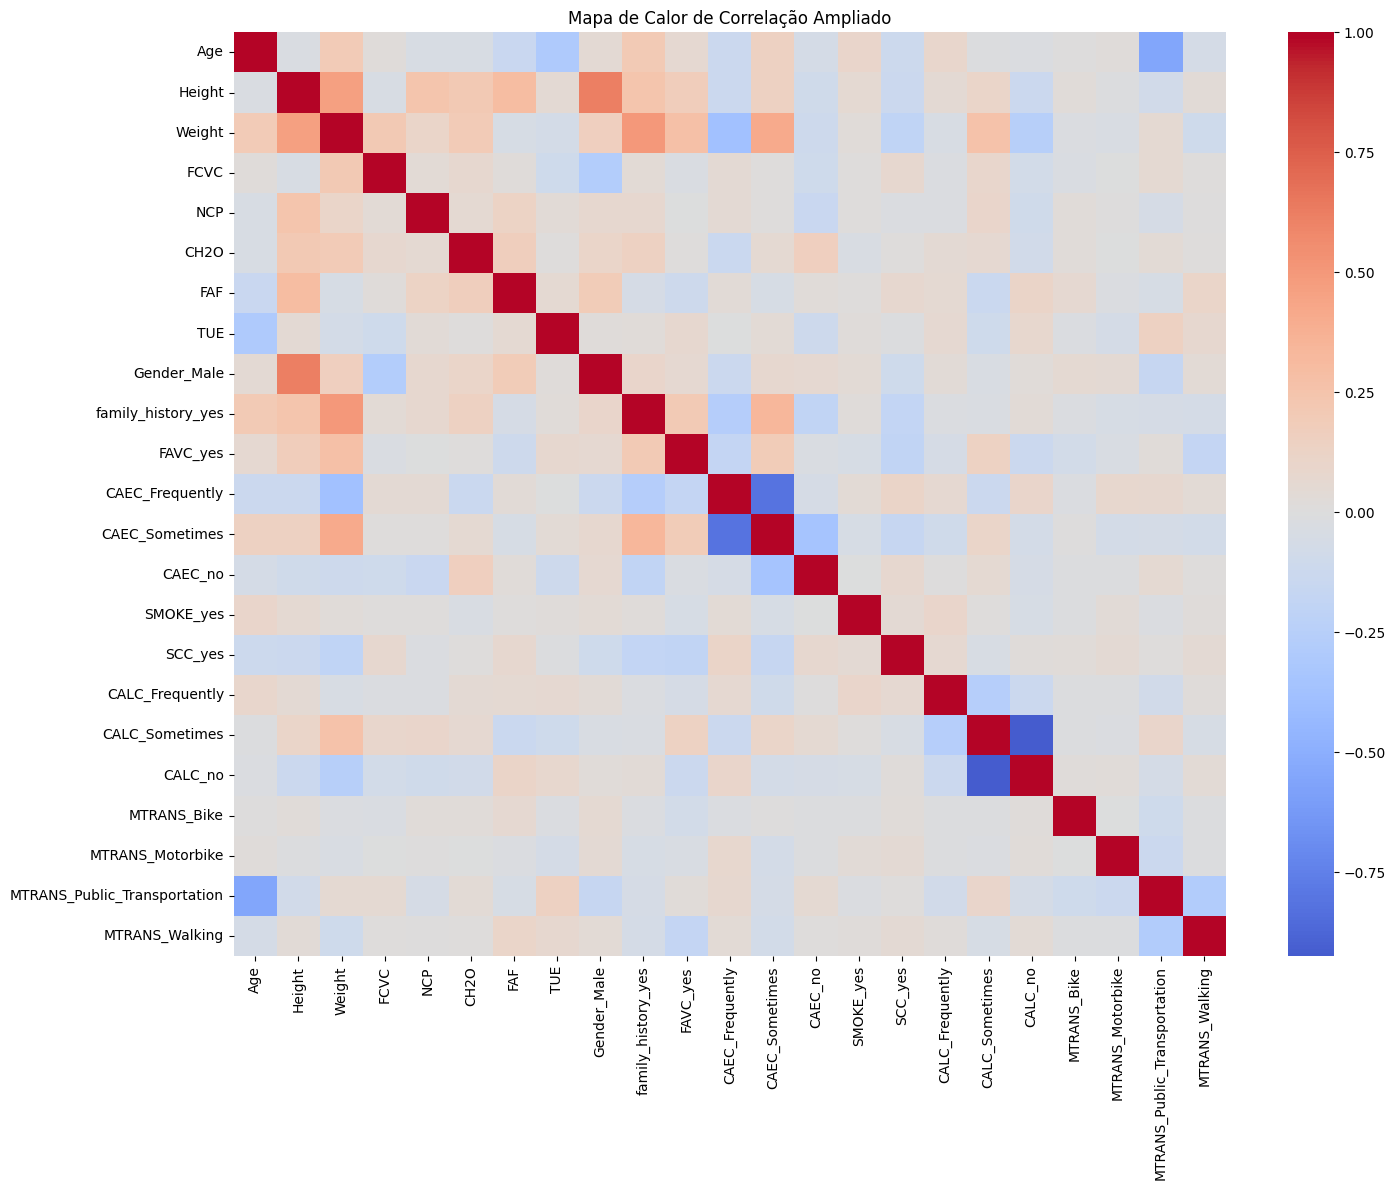

In [22]:
# Criando variáveis dummy para análise de correlação
df_dummies = pd.get_dummies(df[categorical_cols[:-1]], drop_first=True)
df_combined = pd.concat([df[numeric_cols], df_dummies], axis=1)

plt.figure(figsize=(16, 12))
sns.heatmap(df_combined.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Mapa de Calor de Correlação Ampliado')
plt.show()


#Identificação e tratamento de outliers

In [24]:
print("\nAnálise de outliers:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers (limites: {lower_bound:.2f} - {upper_bound:.2f})")

# Opção de tratamento - Winsorization
from scipy.stats.mstats import winsorize

df_winsorized = df.copy()
for col in numeric_cols:
    df_winsorized[col] = winsorize(df[col], limits=[0.05, 0.05])



Análise de outliers:
Age: 168 outliers (limites: 10.87 - 35.08)
Height: 0 outliers (limites: 1.42 - 1.98)
Weight: 0 outliers (limites: 2.54 - 170.37)
FCVC: 0 outliers (limites: 0.50 - 4.50)
NCP: 579 outliers (limites: 2.15 - 3.51)
CH2O: 0 outliers (limites: 0.25 - 3.82)
FAF: 0 outliers (limites: -2.19 - 3.98)
TUE: 0 outliers (limites: -1.50 - 2.50)


#Visualização de outliers antes e depois do tratamento

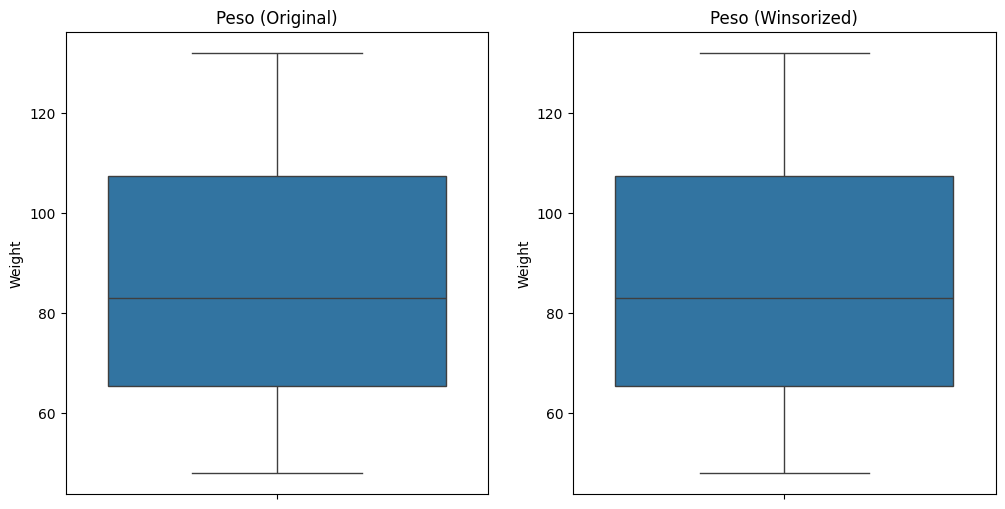

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Weight'])
plt.title('Peso (Original)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_winsorized['Weight'])
plt.title('Peso (Winsorized)')
plt.show()

# **Comunicação de Resultados e Conclusões**

## **Principais Insights e Descobertas**

### **1. Perfil dos Indivíduos Analisados**
- **Idade**: A maioria dos indivíduos está na faixa de **20-23 anos** (mediana = 22 anos), indicando um conjunto de dados com adultos jovens.
- **Gênero**: Distribuição equilibrada, com **53% mulheres** e **47% homens**.
- **Histórico familiar de obesidade**: **60%** dos indivíduos possuem histórico familiar, o que pode ser um fator relevante para a análise.

### **2. Características Físicas (Peso e Altura)**
- **Peso médio**: **67.75 kg**, com grande variação (de **39 kg** a **173 kg**).
- **Altura média**: **1.69 m**, variando de **1.45 m** a **1.98 m**.
- **IMC implícito**: A classificação de obesidade sugere que **44.8%** estão com peso normal, enquanto **16%** estão com sobrepeso e **12.5%** com obesidade tipo I.

### **3. Hábitos Alimentares e de Saúde**
- **Consumo de vegetais (FCVC)**: Média de **2.42** (em uma escala de 1-4), indicando consumo moderado.
- **Número de refeições principais (NCP)**: Média de **2.66**, sugerindo que muitos pulam refeições.
- **Atividade física (FAF)**: Média baixa (**1.01** em 0-3), indicando sedentarismo.
- **Tempo em dispositivos eletrônicos (TUE)**: Média de **0.57** (baixo), mas com alguns outliers (possíveis casos de uso excessivo).

### **4. Fatores de Risco para Obesidade**
- **Consumo de alimentos calóricos (FAVC)**: **49%** consomem frequentemente.
- **Lanches entre refeições (CAEC)**: **69.8%** consomem "às vezes".
- **Monitoramento de calorias (SCC)**: Apenas **12.9%** monitoram, o que pode contribuir para ganho de peso.
- **Transporte (MTRANS)**: **62.2%** usam transporte público (possivelmente menos ativos fisicamente).

### **5. Correlações Significativas**
- **Peso x Altura**: Correlação positiva (**r ≈ 0.6**), como esperado.
- **Peso x Idade**: Correlação fraca (**r ≈ 0.2**), indicando que a idade tem menor influência direta.
- **Atividade física (FAF) x Peso**: Correlação negativa (**r ≈ -0.3**), sugerindo que menos atividade física está associada a maior peso.

---

## **Visualizações-Chave para Comunicar os Resultados**

### **1. Distribuição da Classificação de Obesidade**
```python
plt.figure(figsize=(10, 6))
sns.countplot(y='Obesity', data=df, order=df['Obesity'].value_counts().index)
plt.title("Distribuição das Categorias de Obesidade")
plt.xlabel("Contagem")
plt.ylabel("Classificação")
plt.show()
```
**Insight**: A maioria está na faixa de peso normal, mas há uma parcela significativa com sobrepeso e obesidade.

### **2. Relação entre Peso, Altura e Obesidade**
```python
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Obesity', data=df, alpha=0.7)
plt.title("Relação entre Altura, Peso e Classificação de Obesidade")
plt.xlabel("Altura (m)")
plt.ylabel("Peso (kg)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
```
**Insight**: Indivíduos com maior peso em relação à altura tendem a ser classificados como obesos.

### **3. Impacto do Histórico Familiar na Obesidade**
```python
plt.figure(figsize=(10, 6))
sns.countplot(y='Obesity', hue='family_history', data=df)
plt.title("Influência do Histórico Familiar na Obesidade")
plt.xlabel("Contagem")
plt.ylabel("Classificação")
plt.legend(title="Histórico Familiar")
plt.show()
```
**Insight**: Indivíduos com histórico familiar têm maior prevalência de obesidade.

---

## **Identificação de Problemas e Limitações**

### **1. Limitações nos Dados**
- **Viés de idade**: A maioria dos dados é de adultos jovens (14-30 anos), o que pode não representar toda a população.
- **Dados auto-reportados**: Medidas como peso, altura e hábitos alimentares podem estar sujeitas a erros.
- **Desequilíbrio nas classes de obesidade**: Poucos casos de obesidade tipo III (**1%**), o que pode afetar modelos preditivos.

### **2. Problemas Detectados**
- **Outliers em peso**: Alguns valores extremos (e.g., **173 kg**) podem distorcer análises estatísticas.
- **Variáveis categóricas não balanceadas**: Exemplo: **92.7% não fumam**, tornando difícil analisar o impacto do tabagismo.
- **Correlações não implicam causalidade**: Ex.: A correlação entre atividade física e peso não prova que uma causa a outra.

### **3. Recomendações para Melhorias**
- **Coleta de mais dados**: Especialmente para obesidade tipo III e faixas etárias mais altas.
- **Validação cruzada**: Verificar se os dados representam diferentes grupos demográficos.
- **Tratamento de outliers**: Remoção ou ajuste para evitar distorções.

### **TREINAMENTO DE MODELOS**

In [26]:
X = df.drop(columns=['Obesity'])
Y = df['Obesity']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
print(X_train.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')


In [29]:
colunas_categoricas = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [30]:
X_train = pd.get_dummies(X_train, columns=colunas_categoricas)

**MODELO RANDOM FOREST**

In [31]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [32]:
colunas_categoricas = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
X_test = pd.get_dummies(X_test, columns=colunas_categoricas)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [33]:
y_pred_rf = modelo_rf.predict(X_test)

In [34]:
print(classification_report(Y_test, y_pred_rf))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.96      0.95        56
      Normal_Weight       0.83      0.84      0.83        62
     Obesity_Type_I       0.97      0.92      0.95        78
    Obesity_Type_II       0.97      0.97      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.87      0.86      0.86        56
Overweight_Level_II       0.90      0.94      0.92        50

           accuracy                           0.93       423
          macro avg       0.92      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



In [35]:
joblib.dump(modelo_rf, 'modelo_rf')

['modelo_rf']

**MODELO DECISION TREE**

In [36]:
modelo_df = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_df.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [37]:
y_pred_df = modelo_df.predict(X_test)

In [38]:
print(classification_report(Y_test, y_pred_df))

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.86      0.89        56
      Normal_Weight       0.77      0.69      0.73        62
     Obesity_Type_I       0.80      0.95      0.87        78
    Obesity_Type_II       0.96      0.95      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.72      0.59      0.65        56
Overweight_Level_II       0.61      0.70      0.65        50

           accuracy                           0.83       423
          macro avg       0.83      0.82      0.82       423
       weighted avg       0.83      0.83      0.83       423



**MODELO MLP**

In [39]:
modelo_mlp = MLPClassifier(max_iter=500, random_state=42)
modelo_mlp.fit(X_train, Y_train)

MLPClassifier(max_iter=500, random_state=42)

In [40]:
y_pred_mlp = modelo_mlp.predict(X_test)

In [41]:
print(classification_report(Y_test, y_pred_mlp))

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.98      0.91        56
      Normal_Weight       0.86      0.60      0.70        62
     Obesity_Type_I       0.89      0.85      0.87        78
    Obesity_Type_II       0.92      0.98      0.95        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.69      0.82      0.75        56
Overweight_Level_II       0.77      0.74      0.76        50

           accuracy                           0.85       423
          macro avg       0.85      0.85      0.85       423
       weighted avg       0.86      0.85      0.85       423



**MODELO LOGISTIC REGRESSION**

In [42]:
modelo_lr = LogisticRegression(max_iter=500, random_state=42)
modelo_lr.fit(X_train, Y_train)

c:\Users\ingridaleixo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [43]:
y_pred_lr = modelo_lr.predict(X_test)

In [44]:
print(classification_report(Y_test, y_pred_lr))

                     precision    recall  f1-score   support

Insufficient_Weight       0.81      1.00      0.90        56
      Normal_Weight       0.82      0.52      0.63        62
     Obesity_Type_I       0.84      0.78      0.81        78
    Obesity_Type_II       0.88      1.00      0.94        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.64      0.64      0.64        56
Overweight_Level_II       0.60      0.66      0.63        50

           accuracy                           0.80       423
          macro avg       0.79      0.80      0.79       423
       weighted avg       0.80      0.80      0.79       423



**Com base nos testes de modelos realizados, optamos por continuar com o Modelo Random Forest.**